# Customer_Segmentation

İLERİ SEVİYE MÜŞTERİ SEGMENTASYONU PROJESİ
Bu projemizde Massachusetts Institute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphane kullanacağız.
Verilerimiz komplex olduğu için burada K-Means kullanamıyoruz.

In [11]:
import numpy as np
import pandas as pd

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
# kmodes kütüphanesi standart distribution içinde gelmez sizin install etmeniz gerekebilir.
# Massachusetts Institute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphanedir.
# https://anaconda.org/conda-forge/kmodes linkinde detay mevcuttur
# conda install -c conda-forge kmodes
from kmodes.kprototypes import KPrototypes#(hem kat. hem numeric verileri kullanabiliryoruz.)
from kmodes.kmodes import KModes


In [13]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Basit seg projesinde 2 ya da 3 tane numerik değişkenler vardı kategroik  değişken yoktu ve K-means algoritmasını kullanmıştık,K-means sadece numerik değerlrde kullanılır.şimdi bu örneğimiz biraz daha karmaşık bir örnek olacak.Hem kategroik hem
de numerik değerler olacak.Bu projede Massachusetts adında yeni seviye bir kütüphane kullanacağız:kmodes.

In [14]:
df.tail()
#cinsiyet,medenihal,eğitim hepsi kategorik veri.

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [15]:
df.isnull().sum()  #null değer var mı görelim.

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [16]:
# iki numerik değeri normalizasyon yapıcaz.
df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [18]:
# normalizasyon
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [19]:
df = df.drop(['ID'],axis = 1) #ıd yi silelim.

In [21]:
# kmodes modeli numerik verileri float istiyor 
mark_array = df.values       #(mark_array :numerik iki sütunu ifade eder.)

mark_array[:,2]=mark_array[:,2].astype(float)
mark_array[:,4]=mark_array[:,4].astype(float)

In [23]:
# BUİLD OUR MODEL.
# kaç clustera böleceğimizi cluster ile söyledik.
 # verbose : aldığı loglar
    # max_iter sayısını değiştirerek bakılabilir ,incele.
kproto = KPrototypes(n_clusters=10,verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array,categorical=[0,1,3,5,6])
# kategroik olanları belirttik.2 ve 4 numerik.

print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 750, ncost: 176.67723805571137
Run: 1, iteration: 2/20, moves: 379, ncost: 162.43302416892888
Run: 1, iteration: 3/20, moves: 86, ncost: 161.45992745039595
Run: 1, iteration: 4/20, moves: 23, ncost: 161.34404194208756
Run: 1, iteration: 5/20, moves: 3, ncost: 161.34106748363456
Run: 1, iteration: 6/20, moves: 2, ncost: 161.34025624463743
Run: 1, iteration: 7/20, moves: 0, ncost: 161.34025624463743
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 538, ncost: 186.66510677657507
Run: 2, iteration: 2/20, moves: 244, ncost: 177.68598424665254
Run: 2, iteration: 3/20, moves: 163, ncost: 176.34259517536694
Run: 2, iteration: 4/20, moves: 48, ncost: 176.22248514440813
Run: 2, iteration: 5/20

10

In [25]:
cluster_dict = []   # clusterları görmek için.
for c in clusters:
    cluster_dict.append(c)  # ekledim.
    
df['cluster'] = cluster_dict   
# her bir müşterinn hangi clustera ait old. yazdırdık karşısına,tabloya.  

df[['ID','Age','Income']] = df_temp #orijinal değerleri temp de saklıyoduk.
# çünkü normalize edince gerçek değerler gidiyor.
# eski haline atıyoruz. görselleştirmede anlayabilmek için.

In [ ]:
df[df['cluster']==0].head(10) 
# cluster 0 olan müşteriler.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


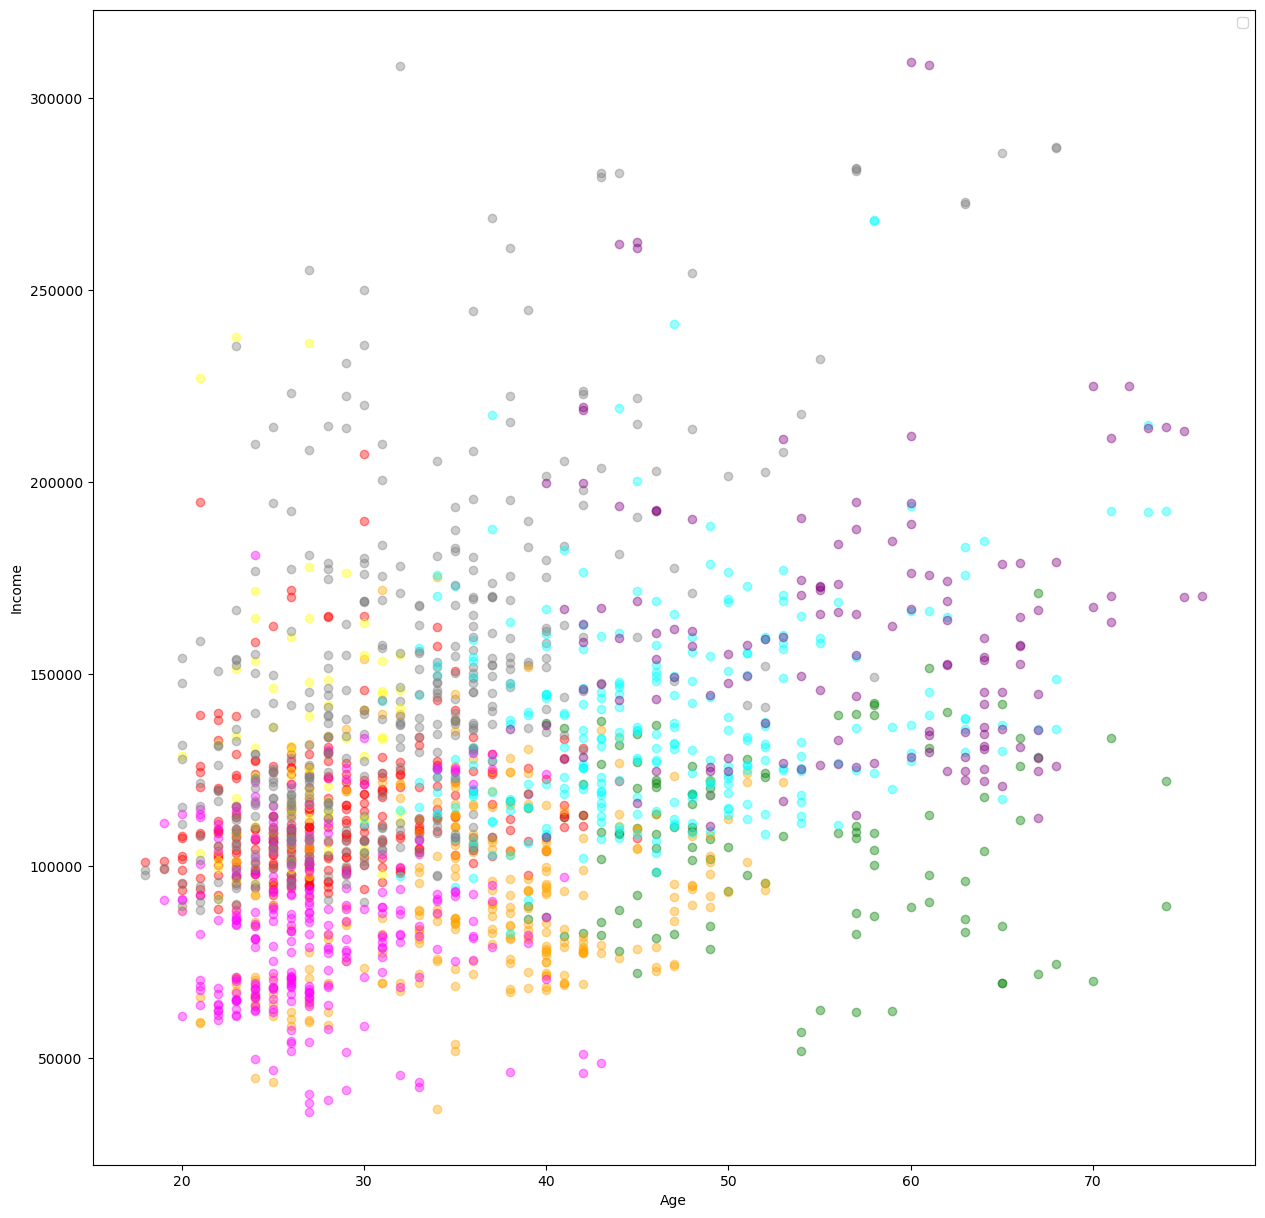

In [26]:
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]
df5 = df[df.cluster==5]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age,df1['Income'],color='green',alpha = 0.4)
plt.scatter(df2.Age,df2['Income'],color='red',alpha = 0.4)
plt.scatter(df3.Age,df3['Income'],color='gray',alpha = 0.4)
plt.scatter(df4.Age,df4['Income'],color='orange',alpha = 0.4)
plt.scatter(df5.Age,df5['Income'],color='yellow',alpha = 0.4)
plt.scatter(df6.Age,df6['Income'],color='cyan',alpha = 0.4)
plt.scatter(df7.Age,df7['Income'],color='magenta',alpha = 0.4)
plt.scatter(df8.Age,df8['Income'],color='gray',alpha = 0.4)
plt.scatter(df9.Age,df9['Income'],color='purple',alpha = 0.4)
plt.scatter(df10.Age,df10['Income'],color='blue',alpha = 0.4)

# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y
   # sütunlarım kmeans_modelim.c
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
#plt.scatter(kmeans_modelim. cluster_centers_[:,0], kmeans_modelim. 
  #cluster_centers_[:,1], color='blue',

plt.legend()
plt.show()

Örneğin yeşiller büyük yaşdaki insanlar bunlara yaşına göre birşeyler önerebilir.bu küçük bir bakış başka değişkenlerle ortak ilişkisine bakılıp yeni tavsiyler,öneriler yapılabilir.